In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [4]:
df.isna().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# df = df.drop(['deck' , 'embark_town' ,'alone'],axis=1) 
df = df.drop(['deck'],axis=1)

In [6]:
df.age.mean()

29.69911764705882

In [7]:
df['age'] = df['age'].fillna(29).astype(int)

In [8]:
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
df['embarked'] = df['embarked'].ffill()
df['embark_town'] = df['embark_town'].ffill()

In [10]:
df.isna().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [11]:
df['survived']  = df['survived'].replace('yes',1)
df['survived']  = df['survived'].replace('no',0)

In [12]:
df['sex']  = df['sex'].replace('male',1)
df['sex']  = df['sex'].replace('female',0)

In [13]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,1,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,0,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,0,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,0,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,1,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [14]:
df.value_counts('survived')

survived
0    549
1    342
dtype: int64

In [15]:
X = df[['sex', 'age']]
y = df[['survived']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size= 0.2,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()


In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test,y_pred)

0.29633638519212735

Text(0.5, 1.0, 'Atual vs Predicted')

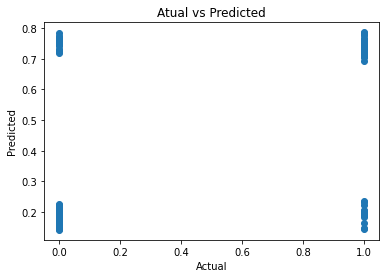

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title('Atual vs Predicted')

## Linear Regression Model

In [25]:
age =df['age']
sur = df['survived']

In [26]:
X = np.array(age).reshape(-1,1)
y = np.array(sur).reshape(-1,1)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=  model.predict(X_test)

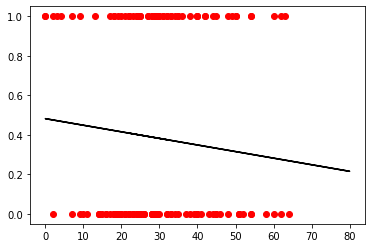

In [30]:
plt.scatter(X_test , y_test , color='r')
plt.plot(X,model.predict(X),color='black')

In [31]:
model.score(y_test,y_pred)

-5.248728995099652